In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


### Example data load

In [3]:
Data = np.loadtxt('ThoraricSurgery.csv', delimiter=',')

### Splitting data into input and output

In [4]:
X = Data[:, :17]
Y = Data[:, 17]
X.shape, Y.shape

((470, 17), (470,))

### Sequential API

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
## Instantiation
model = keras.models.Sequential()

In [7]:
## Input layer with 17 features
model.add(keras.Input(shape=(17,)))


In [8]:
## Hidden layer 1 with a 2D wiegh matrix (17 , 10) and a 2D bias matrix (1, 10)
model.add(Dense(10, activation='relu'))

In [9]:
## Hidden layer 2 with a 2D wiegh matrix (10 , 5) and a 2D bias matrix (1, 5)
model.add(Dense(5, activation='relu'))

In [10]:
## Output layer a 2D wiegh matrix (5 , 1) and a 2D bias matrix (1, 1)
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


 ### Compliling the model
 #### You need to sepcify the loss function and the optimizer

In [12]:
model.compile(loss='BCE', optimizer='adam')

In [13]:
model.fit(X,Y, validation_split=0.2, epochs=50, batch_size=200)
Logs = model.history.history

Epoch 1/50
2/2 [==============================] - 3s 1s/step - loss: 25.8893 - val_loss: 26.3297
Epoch 2/50
2/2 [==============================] - 0s 31ms/step - loss: 23.0058 - val_loss: 22.3314
Epoch 3/50
2/2 [==============================] - 0s 31ms/step - loss: 19.5064 - val_loss: 18.1890
Epoch 4/50
2/2 [==============================] - 0s 31ms/step - loss: 16.4379 - val_loss: 14.1722
Epoch 5/50
2/2 [==============================] - 0s 29ms/step - loss: 13.4104 - val_loss: 10.2357
Epoch 6/50
2/2 [==============================] - 0s 30ms/step - loss: 10.6168 - val_loss: 6.5328
Epoch 7/50
2/2 [==============================] - 0s 30ms/step - loss: 7.7450 - val_loss: 4.3164
Epoch 8/50
2/2 [==============================] - 0s 29ms/step - loss: 5.6051 - val_loss: 3.3484
Epoch 9/50
2/2 [==============================] - 0s 31ms/step - loss: 4.4545 - val_loss: 2.9083
Epoch 10/50
2/2 [==============================] - 0s 28ms/step - loss: 3.4886 - val_loss: 2.7370
Epoch 11/50
2/2 [===

### Visualization of losses

In [14]:
import matplotlib.pyplot as plt


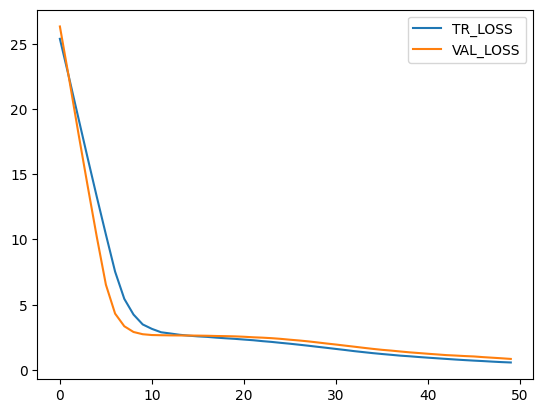

In [15]:
plt.plot(Logs['loss'], label='TR_LOSS')
plt.plot(Logs['val_loss'], label='VAL_LOSS')
plt.legend()